In [16]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
# fetch data
df = pd.read_excel("C:\\Users\\Soumya\\Desktop\\Jupyter\\New Folder\\NYSERDA_DER_Metric_Data.xlsx")

df.head()

,Facility ID,Facility Name,Address Line 1,Address Line 2,City,State,ZIP,Latitude (°N),Longitude (°E),Total Rated Electric Generation (kW),...,Alternate Name(s),Facility Website (external),Category,Subcategory,Floor Area (ft²),No. of Occupancy Units,Electric Utility,Gas Utility,NYISO Zone,Located in Flood Plain
0,5,Aurora Ridge Dairy,2542 Angling Rd,NaN,Aurora,NY,13026,43.031,-76.467,600.0,...,NaN,NaN,Agricultural,Dairy,87120000.0,NaN,New York State Electric and Gas,New York State Electric and Gas,C - Central,NaN
1,11,Emerling Farm,2616 NY-246,NaN,Perry,NY,14530,42.758,-78.006,200.0,...,NaN,NaN,Agricultural,Dairy,NaN,NaN,New York State Electric and Gas,New York State Electric and Gas,A - West,NaN
2,23,River Point Towers,555 Kappock Ave,NaN,Bronx,NY,10463,40.882,-73.917,300.0,...,NaN,NaN,Residential,Multifamily,NaN,NaN,Consolidated Edison,Consolidated Edison,J - New York City,NaN
3,24,Burke Rehabilitation Hospital,785 Mamoroneck Ave,NaN,White Plains,NY,10605,41.016,-73.752,600.0,...,NaN,http://burke.org,Health Care (Inpatient),Hospital,NaN,NaN,Consolidated Edison,Consolidated Edison,I - Dunwoodie,NaN
4,25,East Rochester School District,400 Woodbine Ave,NaN,East Rochester,NY,14445,43.108,-77.488,200.0,...,NaN,http://www.erschools.org/,Education,NaN,NaN,NaN,Rochester Gas and Electric,Rochester Gas and Electric,B - Genessee,NaN


In [3]:
print(df.shape)
df.info()

(811, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 35 columns):
Facility ID                                                                 811 non-null int64
Facility Name                                                               811 non-null object
Address Line 1                                                              706 non-null object
Address Line 2                                                              0 non-null float64
City                                                                        811 non-null object
State                                                                       811 non-null object
ZIP                                                                         811 non-null object
Latitude (°N)                                                               811 non-null float64
Longitude (°E)                                                              811 non-null float64
Total Rated Electric 

In [38]:
# delete columns having less than 50% data
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.5]]
del df2["Facility ID"]  # delete ID
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print("\n", c, end="")
print('\n')
df = df2

List of dropped columns: 
 Facility ID
 Address Line 2
 Alternate Name(s)
 Floor Area (ft²)
 No. of Occupancy Units
 Gas Utility
 Located in Flood Plain



In [5]:
df.columns

Index(['Facility Name', 'Address Line 1', 'City', 'State', 'ZIP',
       'Latitude (°N)', 'Longitude (°E)',
       'Total Rated Electric Generation (kW)',
       'Total Rated Heat Generation (MBtu/h)',
       'Total Rated Electrical Discharge Capacity (kW)',
       'Total Rated Electrical Storage Capacity (kWh)',
       'Total Rated Cooling Energy Discharge Capacity (ton)',
       'Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW)',
       'Total Rated Cooling Energy Storage Capacity (ton-hour)',
       'Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh)',
       'Total Rated Thermal Energy Discharge Capacity (MBtu/h)',
       'Total Equivalent Electrical Discharge Capacity from Thermal Sources (kW)',
       'Total Rated Thermal Energy Storage Capacity (MBtu)',
       'Total Equivalent Electrical Storage Capacity from Thermal Sources (kWh)',
       'Facility Submits Data on Electricity Imported from Utility?',
       'Source Weather Station f

In [19]:
# Numerical Distribution Analysis
set(df.dtypes)

{dtype('int64'), dtype('<M8[ns]'), dtype('bool'), dtype('float64'), dtype('O')}

In [39]:
df_num = df.select_dtypes(include = ["int64", "float64"])
df_num.head()

,Latitude (°N),Longitude (°E),Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h),Total Rated Electrical Discharge Capacity (kW),Total Rated Electrical Storage Capacity (kWh),Total Rated Cooling Energy Discharge Capacity (ton),Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW),Total Rated Cooling Energy Storage Capacity (ton-hour),Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh),Total Rated Thermal Energy Discharge Capacity (MBtu/h),Total Equivalent Electrical Discharge Capacity from Thermal Sources (kW),Total Rated Thermal Energy Storage Capacity (MBtu),Total Equivalent Electrical Storage Capacity from Thermal Sources (kWh),Installed Systems
0,43.031,-76.467,600.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,1
1,42.758,-78.006,200.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,1
2,40.882,-73.917,300.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,1
3,41.016,-73.752,600.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,1
4,43.108,-77.488,200.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,1


In [21]:
df_num.describe()

,Latitude (°N),Longitude (°E),Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h),Total Rated Electrical Discharge Capacity (kW),Total Rated Electrical Storage Capacity (kWh),Total Rated Cooling Energy Discharge Capacity (ton),Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW),Total Rated Cooling Energy Storage Capacity (ton-hour),Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh),Total Rated Thermal Energy Discharge Capacity (MBtu/h),Total Equivalent Electrical Discharge Capacity from Thermal Sources (kW),Total Rated Thermal Energy Storage Capacity (MBtu),Total Equivalent Electrical Storage Capacity from Thermal Sources (kWh),Installed Systems
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.0,811.000000,811.000000,8.110000e+02,811.0,811.0,811.0,811.0,811.000000
mean,41.717059,-74.690903,876.536396,428.617883,48.148274,93.899507,0.0,18.376942,143.545006,1.590925e+03,0.0,0.0,0.0,0.0,1.056720
std,1.052432,1.436469,2063.768717,5260.082111,740.214971,1531.452257,0.0,211.840662,1433.684633,4.315059e+04,0.0,0.0,0.0,0.0,0.622015
min,40.520465,-79.645000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000
25%,40.758131,-75.030587,70.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.000000
50%,41.295949,-73.986483,300.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.000000
75%,42.764421,-73.885000,912.354500,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.000000
max,44.895567,-71.946369,37500.000000,127000.000000,20000.000000,40000.000000,0.0,5000.000000,30000.000000,1.228680e+06,0.0,0.0,0.0,0.0,11.000000


F:\rohan\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


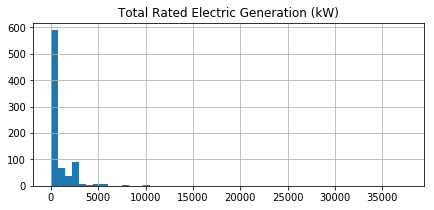

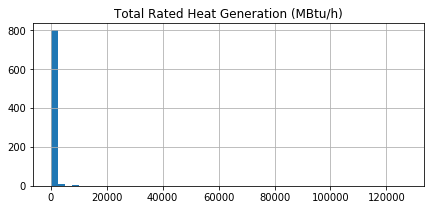

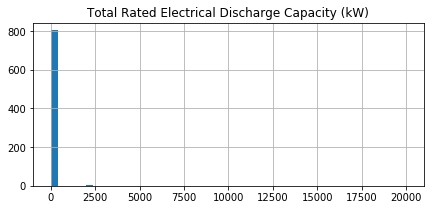

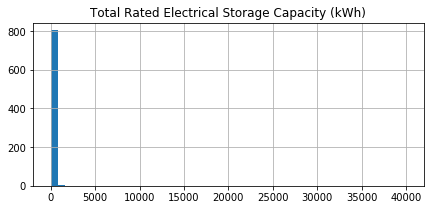

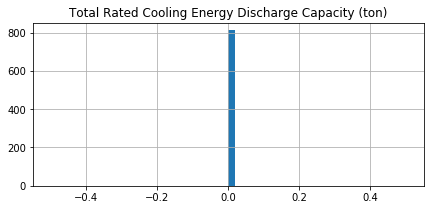

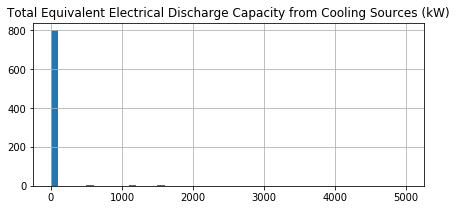

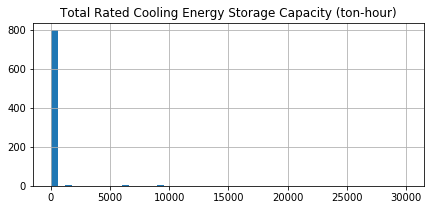

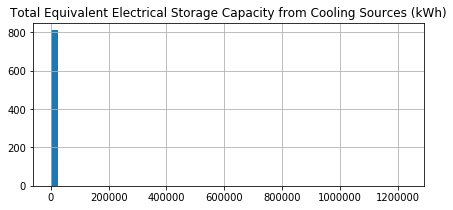

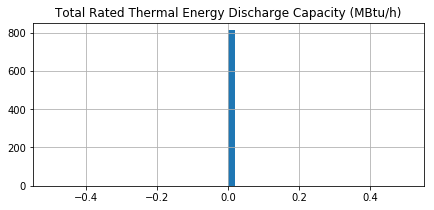

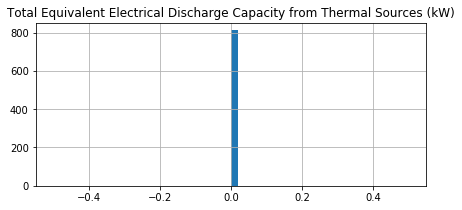

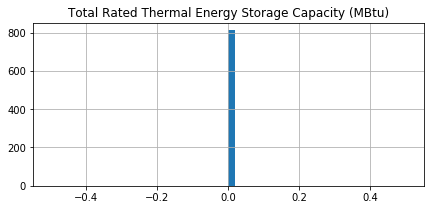

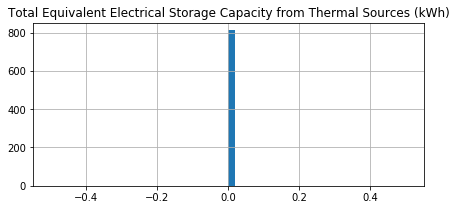

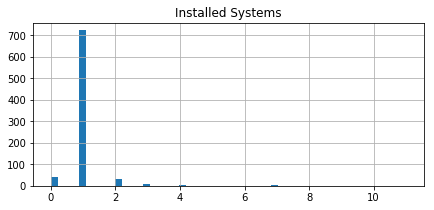

In [22]:
# we don't need to do analysis of Latitude and longitude
df_num.drop(df_num.columns[0:2], axis=1, inplace=True)
count=0
for c in df_num.columns:
    filename='image_eda_'+str(count)+'.jpg'
    df_num.hist(column=c, bins=50)
    fig = plt.gcf()
    fig.set_size_inches(7, 3)
    plt.savefig(filename, dpi=100)
    count=count+1
# lot of 0s

In [23]:
#df_num.drop(df_num.columns[0:2], axis=1, inplace=True)
df_num.corr()

,Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h),Total Rated Electrical Discharge Capacity (kW),Total Rated Electrical Storage Capacity (kWh),Total Rated Cooling Energy Discharge Capacity (ton),Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW),Total Rated Cooling Energy Storage Capacity (ton-hour),Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh),Total Rated Thermal Energy Discharge Capacity (MBtu/h),Total Equivalent Electrical Discharge Capacity from Thermal Sources (kW),Total Rated Thermal Energy Storage Capacity (MBtu),Total Equivalent Electrical Storage Capacity from Thermal Sources (kWh),Installed Systems
Total Rated Electric Generation (kW),1.000000,0.157261,-0.027425,-0.025635,NaN,-0.035714,-0.041592,-0.015644,NaN,NaN,NaN,NaN,0.112160
Total Rated Heat Generation (MBtu/h),0.157261,1.000000,-0.005307,-0.005002,NaN,-0.007077,-0.008169,-0.003008,NaN,NaN,NaN,NaN,0.003255
Total Rated Electrical Discharge Capacity (kW),-0.027425,-0.005307,1.000000,0.380330,NaN,-0.005650,-0.006521,-0.002401,NaN,NaN,NaN,NaN,-0.005134
Total Rated Electrical Storage Capacity (kWh),-0.025635,-0.005002,0.380330,1.000000,NaN,-0.005325,-0.006147,-0.002263,NaN,NaN,NaN,NaN,-0.004043
Total Rated Cooling Energy Discharge Capacity (ton),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW),-0.035714,-0.007077,-0.005650,-0.005325,NaN,1.000000,0.954143,0.836265,NaN,NaN,NaN,NaN,-0.007920
Total Rated Cooling Energy Storage Capacity (ton-hour),-0.041592,-0.008169,-0.006521,-0.006147,NaN,0.954143,1.000000,0.743799,NaN,NaN,NaN,NaN,-0.009141
Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh),-0.015644,-0.003008,-0.002401,-0.002263,NaN,0.836265,0.743799,1.000000,NaN,NaN,NaN,NaN,-0.003366
Total Rated Thermal Energy Discharge Capacity (MBtu/h),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Equivalent Electrical Discharge Capacity from Thermal Sources (kW),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


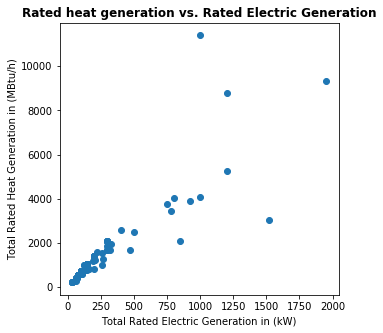

In [56]:
m=max(df_num["Total Rated Heat Generation (MBtu/h)"])
# remove outliers and 0s
df2 = df_num.loc[(df_num["Total Rated Heat Generation (MBtu/h)"]!=0) & (df_num["Total Rated Heat Generation (MBtu/h)"]!=m)
                 & (df_num["Total Rated Heat Generation (MBtu/h)"]<70000),:]
plt.scatter(df2["Total Rated Electric Generation (kW)"], df2["Total Rated Heat Generation (MBtu/h)"])
plt.ylabel('Total Rated Heat Generation in (MBtu/h)')
plt.xlabel('Total Rated Electric Generation in (kW)')
plt.title('Rated heat generation vs. Rated Electric Generation', fontweight='bold')
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.savefig('biva1.jpg')
plt.show()

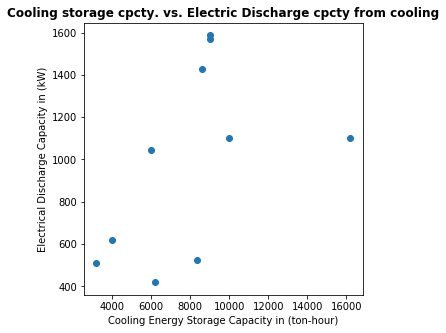

In [57]:
m = max(df["Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW)"])
# remove outliers and 0s
df2 = df.loc[(df["Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW)"]!=0) & (df["Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW)"]!=m),:]
plt.scatter(df2["Total Rated Cooling Energy Storage Capacity (ton-hour)"], df2["Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW)"])
plt.xlabel('Cooling Energy Storage Capacity in (ton-hour)')
plt.ylabel('Electrical Discharge Capacity in (kW)')
plt.title('Cooling storage cpcty. vs. Electric Discharge cpcty from cooling', fontweight='bold')
plt.show()

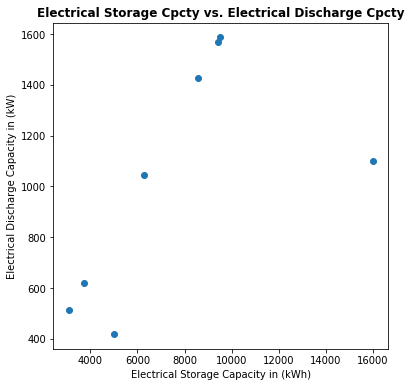

In [61]:
m = max(df["Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh)"])
# remove outliers and 0s
df2 = df.loc[(df["Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh)"]!=0) & (df["Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh)"]!=m),:]
plt.scatter(df2["Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh)"], df2["Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW)"])
plt.xlabel('Electrical Storage Capacity in (kWh)')
plt.ylabel('Electrical Discharge Capacity in (kW)')
plt.title('Electrical Storage Cpcty vs. Electrical Discharge Cpcty', fontweight='bold')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.savefig('biva2.jpg')
plt.show()

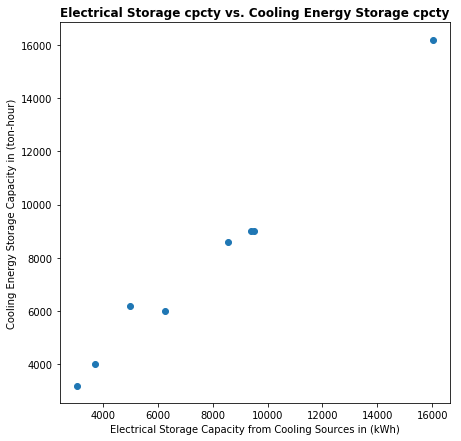

In [62]:
m = max(df["Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh)"])
# remove outliers and 0s
df2 = df.loc[(df["Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh)"]!=0) & (df["Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh)"]!=m),:]
plt.scatter(df2["Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh)"], df2["Total Rated Cooling Energy Storage Capacity (ton-hour)"])
plt.xlabel('Electrical Storage Capacity from Cooling Sources in (kWh)')
plt.ylabel('Cooling Energy Storage Capacity in (ton-hour)')
plt.title('Electrical Storage cpcty vs. Cooling Energy Storage cpcty', fontweight='bold')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.savefig('biva3.jpg')
plt.show()

In [10]:
df_num.mode(numeric_only=True)

,Total Rated Electric Generation (kW),Total Rated Heat Generation (MBtu/h),Total Rated Electrical Discharge Capacity (kW),Total Rated Electrical Storage Capacity (kWh),Total Rated Cooling Energy Discharge Capacity (ton),Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW),Total Rated Cooling Energy Storage Capacity (ton-hour),Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh),Total Rated Thermal Energy Discharge Capacity (MBtu/h),Total Equivalent Electrical Discharge Capacity from Thermal Sources (kW),Total Rated Thermal Energy Storage Capacity (MBtu),Total Equivalent Electrical Storage Capacity from Thermal Sources (kWh),Installed Systems
0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,1


In [11]:
for c in df_num.columns:
    print(df_num[c].value_counts().head(), end="\n\n")
# The following columns are all 0s
# Total Rated Cooling Energy Discharge Capacity (ton)
# Total Rated Thermal Energy Discharge Capacity (MBtu/h)
# Total Equivalent Electrical Discharge Capacity from Thermal Sources (kW)
# Total Rated Thermal Energy Storage Capacity (MBtu)
# Total Equivalent Electrical Storage Capacity from Thermal Sources (kWh)

0.0      184
210.0     21
100.0     20
300.0     19
150.0     15
Name: Total Rated Electric Generation (kW), dtype: int64

0.0       708
523.0      13
700.0       8
1046.0      7
1400.0      5
Name: Total Rated Heat Generation (MBtu/h), dtype: int64

0.0      678
5.0       64
10.0      22
100.0     10
15.0       5
Name: Total Rated Electrical Discharge Capacity (kW), dtype: int64

0.0      750
13.5      33
400.0      8
300.0      2
200.0      2
Name: Total Rated Electrical Storage Capacity (kWh), dtype: int64

0    811
Name: Total Rated Cooling Energy Discharge Capacity (ton), dtype: int64

0.0       800
1100.0      2
620.7       1
419.0       1
1567.5      1
Name: Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW), dtype: int64

0       797
9000      2
1522      2
4000      1
6000      1
Name: Total Rated Cooling Energy Storage Capacity (ton-hour), dtype: int64

0.0          802
1228680.0      1
9519.0         1
9405.0         1
6270.0         1
Name: Total Equiv

In [12]:
# Display median ignoring 0s
dict = {}
for i in range(0,13):
    l=[]
    #print(df_num.columns[i],np.median(pd.unique(df_num.iloc[:,i])))
    l.append(np.median(pd.unique(df_num.iloc[:,i])))
    dict[df_num.columns[i]]=l
df_median=pd.DataFrame(dict, index=["median value"])
df_median

,Installed Systems,Total Equivalent Electrical Discharge Capacity from Cooling Sources (kW),Total Equivalent Electrical Discharge Capacity from Thermal Sources (kW),Total Equivalent Electrical Storage Capacity from Cooling Sources (kWh),Total Equivalent Electrical Storage Capacity from Thermal Sources (kWh),Total Rated Cooling Energy Discharge Capacity (ton),Total Rated Cooling Energy Storage Capacity (ton-hour),Total Rated Electric Generation (kW),Total Rated Electrical Discharge Capacity (kW),Total Rated Electrical Storage Capacity (kWh),Total Rated Heat Generation (MBtu/h),Total Rated Thermal Energy Discharge Capacity (MBtu/h),Total Rated Thermal Energy Storage Capacity (MBtu)
median value,3.0,1045.0,0.0,7419.5,0.0,0.0,6200.0,589.66,100.0,400.0,1265.5,0.0,0.0


In [13]:
# categorical analysis
#df["City"].value_counts().head()
cat_1 = df["City"].value_counts()
cat_1_df=cat_1.to_frame()
cat_1_df.reset_index(inplace=True)

for i in range(0,len(cat_1_df)):
    if(cat_1_df["index"].iloc[i] not in ("New York","Brooklyn","Bronx","Staten Island","Rochester")):
        #idx=as_list.index(i)
        #as_list[idx]="Others"
        cat_1_df["index"].iloc[i]="Others"
cat2=cat_1_df.groupby('index').City.agg('sum')


F:\rohan\anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


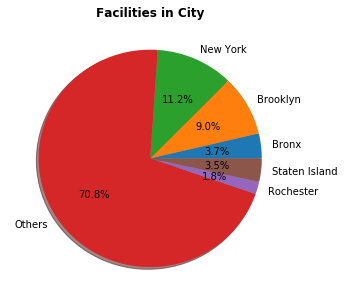

In [14]:
plt.pie(cat2, labels=list(cat2.index), autopct='%1.1f%%', shadow=True)
plt.title('Facilities in City', fontweight='bold')
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.savefig('cat1.jpg', dpi=100)
plt.show()

In [15]:
df["State"].value_counts()

NY    811
Name: State, dtype: int64

In [16]:
df["ZIP"].value_counts().head()

10036    14
11207    11
14850    11
12010    10
13440     8
Name: ZIP, dtype: int64

In [17]:
df["Facility Submits Data on Electricity Imported from Utility?"].value_counts()

False    688
True     123
Name: Facility Submits Data on Electricity Imported from Utility?, dtype: int64

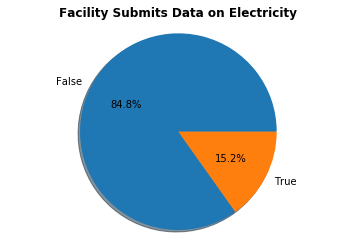

In [18]:
cat = df["Facility Submits Data on Electricity Imported from Utility?"].value_counts()
plt.pie(cat, labels=list(cat.index), autopct='%1.1f%%', shadow=True)
plt.title('Facility Submits Data on Electricity', fontweight='bold')
fig.set_size_inches(5,5)
plt.axis('equal')
plt.savefig('cat2.jpg', dpi=100)
plt.show()

In [19]:
df["Source Weather Station for Ambient Temperature Data"].value_counts().head(6)

KLGA    209
KJFK     97
KALB     89
KSWF     74
KSYR     62
KROC     54
Name: Source Weather Station for Ambient Temperature Data, dtype: int64

F:\rohan\anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


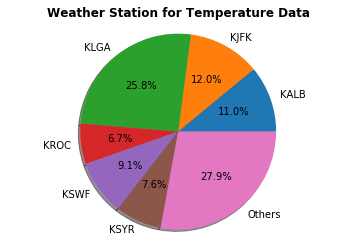

In [20]:
cat_1 = df["Source Weather Station for Ambient Temperature Data"].value_counts()
cat_1_df=cat_1.to_frame()
cat_1_df.reset_index(inplace=True)

for i in range(0,len(cat_1_df)):
    if(cat_1_df["index"].iloc[i] not in ("KLGA","KJFK","KALB","KSWF","KSYR","KROC")):
        #idx=as_list.index(i)
        #as_list[idx]="Others"
        cat_1_df["index"].iloc[i]="Others"
cat2=cat_1_df.groupby('index')["Source Weather Station for Ambient Temperature Data"].agg('sum')
plt.pie(cat2, labels=list(cat2.index), autopct='%1.1f%%', shadow=True)
plt.title('Weather Station for Temperature Data', fontweight='bold')
fig.set_size_inches(5,5)
plt.axis('equal')
plt.savefig('cat3.jpg', dpi=100)
plt.show()

In [21]:
df["Installed Systems"].value_counts()

1     723
0      39
2      33
3       9
4       4
7       2
11      1
Name: Installed Systems, dtype: int64

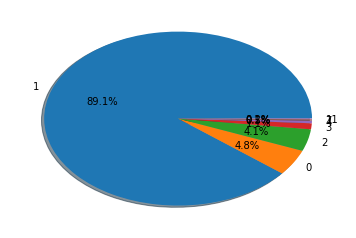

In [22]:
cat=df["Installed Systems"].value_counts()
plt.pie(cat, labels=list(cat.index), autopct='%1.1f%%', shadow=True)
plt.show()

In [23]:
df["Category"].value_counts().head(4)

Residential                             208
Education                                97
Offsite Resource                         92
Mercantile (Retail Other Than Malls)     89
Name: Category, dtype: int64

F:\rohan\anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
F:\rohan\anaconda\lib\site-packages\matplotlib\axes\_axes.py:521: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


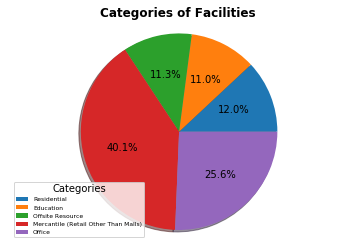

In [60]:
cat_1 = df["Category"].value_counts()
cat_1_df=cat_1.to_frame()
cat_1_df.reset_index(inplace=True)

for i in range(0,len(cat_1_df)):
    if(cat_1_df["index"].iloc[i] not in ("Residential","Education","Offsite Resource","Mercantile (Retail Other Than Malls)")):
        #idx=as_list.index(i)
        #as_list[idx]="Others"
        cat_1_df["index"].iloc[i]="Others"
cat2=cat_1_df.groupby('index')["Category"].agg('sum')
p=plt.pie(cat2, autopct='%1.1f%%', shadow=True)
plt.legend(p, labels=list(cat_1.index), loc='best',prop={'size': 6}, title='Categories')
plt.title('Categories of Facilities', fontweight='bold')
fig.set_size_inches(5,5)
plt.axis('equal')
plt.savefig('cat4.jpg', dpi=100)
plt.show()

In [25]:
df.loc[df["Category"]=="Residential", "Subcategory"].value_counts()

Multifamily               108
Single-family detached    100
Name: Subcategory, dtype: int64

In [26]:
df["Electric Utility"].value_counts()

Consolidated Edison                            352
National Grid - Upstate NY (Niagara Mohawk)    194
New York State Electric and Gas                 83
Central Hudson Gas and Electric                 66
Orange and Rockland Utilities                   55
Rochester Gas and Electric                      36
Long Island Power Authority (PSEG-LI)           25
Name: Electric Utility, dtype: int64

F:\rohan\anaconda\lib\site-packages\matplotlib\axes\_axes.py:521: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


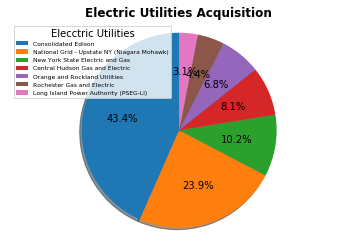

In [27]:
cat=df["Electric Utility"].value_counts()
p=plt.pie(cat, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(p, labels=list(cat.index), loc='best',prop={'size': 6}, title='Elecctric Utilities')
plt.title('Electric Utilities Acquisition', fontweight='bold')
fig.set_size_inches(5,5)
plt.axis('equal')
plt.savefig('cat5.jpg', dpi=100)
plt.show()

In [28]:
df.loc[df["Subcategory"]=="Multifamily","Electric Utility"].value_counts()

Consolidated Edison                107
Central Hudson Gas and Electric      1
Name: Electric Utility, dtype: int64

In [29]:
df.loc[df["Subcategory"]=="Single-family detached","Electric Utility"].value_counts()

Central Hudson Gas and Electric                36
Orange and Rockland Utilities                  33
Long Island Power Authority (PSEG-LI)          16
Consolidated Edison                             9
National Grid - Upstate NY (Niagara Mohawk)     6
Name: Electric Utility, dtype: int64